<a href="https://colab.research.google.com/github/winfred-mutinda-crypto/winfred/blob/master/Language_Identification_Classification_Hachathon_Winfred_Mutinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORE Data Science Academy Classification Hackathon

© Explore Data Science Academy

---
### Honour Code

I {**Winfred Mutinda**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<h2><center>South African Language Identification</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?id=1Gng5_QN5I3TKsbd5kVIkmG33la5sr2hL" width = "700" height = '400'/>

*Introduction*
<p align = "justify">Climate change is the global phenomenon of climate transformation characterized by the changes in the usual climate of the planet (regarding temperature, precipitation, and wind) that are especially caused by human activities. As a result of unbalancing the weather of Earth, the sustainability of the planet’s ecosystems is under threat, as well as the future of humankind and the estability of the global economy.


*About the problem*
<p align = "justify">

*Objective*
<p align = "justify"> We will create a Sentiment Analysis model which will take a text and identify which language the text is in or rather belongs.

*Process*
<p align = "justify">In order to achieve this objective we will follow the process below:-

1. Analyse the supplied data, identify potential errors in the data and clean the existing dataset;

2. Determine if additional features can be added to enrich the dataset;

3. Build a model that is capable of classifying the text based on which language it belongs;

4. Evaluate the accuracy of the best machine learning model;

5. Load our saved file to kaggle competition leaderboard.

*About the data*
<p align = "justify"> The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.\

#### The language IDs has the following categories:

afr - Afrikaans\
eng - English\
nbl - isiNdebele\
nso - Sepedi\
sot - Sesotho\
ssw - siSwati\
tsn - Setswana\
tso - Xitsonga\
ven - Tshivenda\
xho - isiXhosa\
zul - isiZulu

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [2]:
import re
import io
import string
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [3]:
## Loading our train data and storing it in a dataframe
url = 'https://raw.githubusercontent.com/winfred-mutinda-crypto/winfred/master/train_set.csv'
df_train = pd.read_csv(url)
df_train.head(10)



,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [4]:
## Loading our train data and storing it in a dataframe
url = 'https://raw.githubusercontent.com/winfred-mutinda-crypto/winfred/master/test_set.csv'
df_test = pd.read_csv(url)
df_test.head()



,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [5]:
## Loading our train data and storing it in a dataframe
url = 'https://raw.githubusercontent.com/winfred-mutinda-crypto/winfred/master/sample_submission.csv'
df_submission = pd.read_csv(url)
df_submission.head()



,index,lang_id
0,1,tsn
1,2,nbl


In [6]:
df_train.shape

(33000, 2)

In [7]:
df_test.shape

(5682, 2)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### 3.1 Univariate Non-Graphical Analysis
In this sub-section, we are going to view our dataset by considering the following:  \
    i.  Checking presence of *null* values  \
    ii. Checking for dataset data types

In [8]:
# Check for null values
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [9]:
# Check for data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [10]:
## check language counts
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

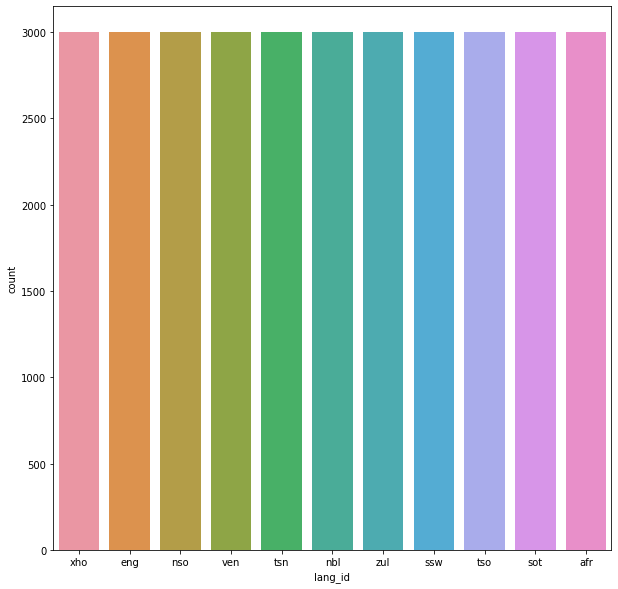

In [11]:
## Visualizing the target feature
plt.figure(figsize=(10,10))
sns.countplot(df_train['lang_id'])

In [12]:
df_train['text'][2]

'the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months'

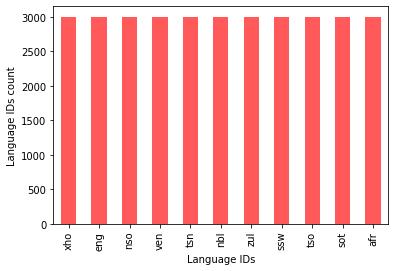

In [13]:
# Bar plot of label classes
fig,ax = plt.subplots()
df_train['lang_id'].value_counts().plot(kind = 'bar', facecolor='r', alpha=0.65)
ax.set_xlabel('Language IDs')
ax.set_ylabel('Language IDs count')
plt.show()

### EDA summary
- The dataset contains two columns (language ID(lang_id) and text)
- Both lang_id and text are non-numeric
- lang_id column has eleven different unique objects with same size.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## Text Cleaning

### Removing Noise

### Converting capitalized words to lowercase words

We write a function called *lowercase_converter* to convert capitalized words to lowercase words

In [14]:
def lowercase_converter(data, col):

    df = data.copy()
    df[col] = df[col].str.lower()

    return df

In [15]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_train = lowercase_converter(df_train, 'text')
new_df_train.head()


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Removing punctuations

We write a function called *punctuation_remover* to remove all punctuation words

In [16]:

def punctuation_remover(data, col):
   
    def operation(text):
        return ''.join([l for l in text if l not in string.punctuation])
    
    df = data.copy()
    
    df[col] = df[col].apply(operation)
    return df

In [17]:
# Create a new dataframe with the text column having no punctuations
new_df_train = punctuation_remover(new_df_train, 'text')
new_df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Remove new lines (\n)

We remove any new line (line starting with '\n'). We write a function *newline_remover* to execute this task.

In [18]:

def newline_remover(data, col):
 
    def operation(text):
        result = re.sub("\n", "", text)
        return result

    df = data.copy()
    
    df[col] = df[col].apply(operation)

    return df

In [19]:
# Create a new dataframe with the message column having no new lines
new_df_train = newline_remover(new_df_train, 'text')
new_df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Transforming text into numbers

- CounterVectorizer
- TfidfVectorizer

Most models do not work well with text, hence the need to convert our text into numbers. To execute this task and more, we can use **CountVectorizer** or **TfidfVectorizer** packages from sklearn library.

#### CountVectorizer
**CountVectorizer** has some **hyperparameters** which we can asign desired values to while initialising. 
The **hyperparameters** that we shall be tunning for these work are: 

- **max_df** :  When building the vocabulary ignore terms that have a document frequency strictly higher than the                     given threshold (corpus-specific stop words). If float, the parameter represents a proportion of                       documents,integer absolute counts.This parameter is ignored if vocabulary is not None.

- **min_df** :  When building the vocabulary ignore terms that have a document frequency strictly lower than the given                 threshold. This value is also called cut-off in the literature. If float, the parameter represents a                   proportion of documents, integer absolute counts.This parameter is ignored if vocabulary is not None.

- **max_features**: If not None, build a vocabulary that only consider the top max_features ordered by term frequency                     across the corpus. This parameter is ignored if vocabulary is not None.

- **analyzer**: Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates                       character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with                 space.

- **ngram_range**: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to                    be extracted.

In [20]:
#CV = CountVectorizer(max_features=3000,analyzer='word', ngram_range=(1, 2))

#### Tfdifvectorizer

In [21]:
tfidf = TfidfVectorizer(max_features = 10000 , max_df=0.7)

In [22]:
# Transform the text column
X_count = tfidf.fit_transform(new_df_train['text'].values.astype(str))
X_count.shape

(33000, 10000)

### Splitting our dataset

In [23]:
# Collect the dependant variable into a variable
y = new_df_train['lang_id']
y[:5]


0    xho
1    xho
2    eng
3    nso
4    ven
Name: lang_id, dtype: object

In [24]:
X_count.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
df1 = pd.DataFrame(data=X_count.toarray(),columns = tfidf.get_feature_names())
df1.head()

,aa,aan,aandag,aandui,aangebied,aangedui,aangegaan,aangeleenthede,aangeleentheid,aangesien,...,ṱhoho,ṱhoḓea,ṱhoḓisiso,ṱhukhu,ṱo,ṱola,ṱoḓa,ṱoḓea,ṱun,ṱuṱuwedza
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Spliting our dataset

Before we proceed to modelling, we have to split our data set into two sets (Training and Testing), to enable us internally evaluate the respective performance of our models. to achive this, we make use of sklearn **train_test_split** class.

In [26]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3, random_state=RANDOM_STATE)

In [27]:
def model_eval(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return (model, classification_report(y_test, y_pred))

In [28]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(multi_class='ovr')

# Train, predict and evaluate model performance 
(logreg_model, model_per) = model_eval(logreg_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       895
         eng       1.00      1.00      1.00       909
         nbl       0.98      0.98      0.98       879
         nso       1.00      1.00      1.00       941
         sot       1.00      1.00      1.00       918
         ssw       1.00      0.99      1.00       908
         tsn       1.00      1.00      1.00       882
         tso       1.00      1.00      1.00       857
         ven       1.00      1.00      1.00       936
         xho       0.98      0.99      0.99       922
         zul       0.98      0.97      0.97       853

    accuracy                           0.99      9900
   macro avg       0.99      0.99      0.99      9900
weighted avg       0.99      0.99      0.99      9900



In [29]:
# Instanciate a RandomForestClassification model
randomF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train, predict and evaluate model performance 
(randomF_model, model_per) = model_eval(randomF_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

         afr       0.99      1.00      1.00       895
         eng       1.00      1.00      1.00       909
         nbl       0.96      0.94      0.95       879
         nso       1.00      1.00      1.00       941
         sot       1.00      1.00      1.00       918
         ssw       0.93      0.97      0.95       908
         tsn       1.00      0.99      1.00       882
         tso       1.00      1.00      1.00       857
         ven       1.00      1.00      1.00       936
         xho       0.97      0.93      0.95       922
         zul       0.92      0.93      0.93       853

    accuracy                           0.98      9900
   macro avg       0.98      0.98      0.98      9900
weighted avg       0.98      0.98      0.98      9900



### Test data set ( for kaggle submission )

To enable us make prediction with our model, we have to import the **test** dataset and execute all data engineering operation executed on the **train** dataset.

These activities are: 
- **delete urls**
- **delete tags**
- **convert words to lowercases**
- **remove punctions**
- **remove newlines**
- **tokenize**
- **stemming**
- **larmming**
- **remove stop words**

In [30]:
# Import and view the first 5 rolls of our training dataset

url = 'https://raw.githubusercontent.com/winfred-mutinda-crypto/winfred/master/test_set.csv'
df_test = pd.read_csv(url)
df_test.head()



,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [31]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_test = lowercase_converter(df_test, 'text')
new_df_test.head()


,index,text
0,1,"mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.


In [32]:
# Create a new dataframe with the text column having no punctuations
new_df_test = punctuation_remover(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [33]:
# Create a new dataframe with the message column having no new lines
new_df_test = newline_remover(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


### Transform test dataset 

We transform the test dataset using the chosen vectorizer ***vector** from the vectorizer section above


In [35]:
# Transform the de_tok column
X_count_test = tfidf.transform(new_df_test['text'].values.astype(str))
X_count_test.shape

(5682, 10000)

In [36]:
text_df = pd.DataFrame(data=X_count_test.toarray(),columns = tfidf.get_feature_names())
text_df.head()

,aa,aan,aandag,aandui,aangebied,aangedui,aangegaan,aangeleenthede,aangeleentheid,aangesien,...,ṱhoho,ṱhoḓea,ṱhoḓisiso,ṱhukhu,ṱo,ṱola,ṱoḓa,ṱoḓea,ṱun,ṱuṱuwedza
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Make predictions with the models generated above for kaggle submission :
- **logreg_model** (Logistics Regression model)
- **randomF_model** (RandomForestClasifier model)


In [46]:
# Make prediction with logistics regression model and the test data
y_pred_logistic = logreg_model.predict(text_df)

In [47]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_random = randomF_model.predict(text_df)

In [48]:
# Choose best model and motivate why it is the best choice

df = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_logistic
})

df.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,nbl


In [49]:
df.to_csv('logistic.csv',index=False)

In [50]:
df = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_random
})

df.head()

,index,lang_id
0,1,ssw
1,2,ssw
2,3,ven
3,4,ssw
4,5,ssw


In [51]:
df.to_csv('randof.csv',index=False)

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
%cd'/content/drive/MyDrive/Colab Notebooks/Classification Hackathon'

/content/drive/MyDrive/Colab Notebooks/Classification Hackathon
